## Data Importing
We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.


For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 


In [4]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
data_path='C:\IntelPython3\projects'
filepath=os.sep.join([data_path]+['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data=pd.read_csv(filepath)

In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


## Answer 1
* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [6]:
# Determining the datatypes count
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [7]:
# float data does not have null values
data.isnull().any() 
data.shape

(10299, 562)

In [8]:
#diff activitie values are grouped and count is given
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encodeddata=le.fit_transform(data['Activity'])
encodeddata=pd.DataFrame(encodeddata,columns=['Activity'])
data=data.drop(columns=['Activity'])
data=pd.concat([data,encodeddata],axis=1)
data.Activity.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

## R & D
* what is correlation?
* what is positively/negatively correlated?
* what is p-value?how to minimize features?

## Answer 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [10]:
from numpy import cov
data.iloc[:,0]

0        0.288585
1        0.278419
2        0.279653
3        0.279174
4        0.276629
           ...   
10294    0.310155
10295    0.363385
10296    0.349966
10297    0.237594
10298    0.153627
Name: tBodyAcc-mean()-X, Length: 10299, dtype: float64

In [11]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
corr=data.corr()
abscorr=corr.abs()


([array([242., 211.,  66.,  23.,   1.,   1.,   5.,   1.,   3.,   0.,   1.,
           3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,
           0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   1.]),
  array([163., 191., 187.,  15.,   0.,   0.,   3.,   0.,   1.,   1.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   1.]),
  array([208., 259.,  62.,  17.,   3.,   3.,   5.,   1.,   0.,   1.,   0.,
           1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
      

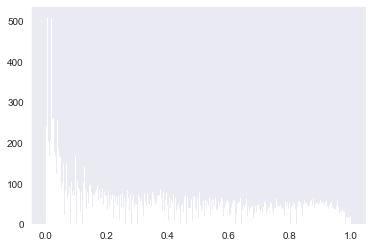

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')
sns.set_palette('Blues')
plt.hist(abscorr,bins=50)
# .set(xLabel='Correlation values')

* if the correlated value between two fields is greater than 0.9 then they are highly correlated

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if abscorr.iloc[i,j]>=0.9:
            if columns[j]:
                columns[j]=False
# selected=data.columns[columns]
# data=data[selected]



## R & D
* why StratifiedShuffleSplit to split equally? why not other?
* what is StratifiedShuffleSplit? how it works?
* what is random state?


## Answer 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(test_size=0.5,train_size=0.5,random_state=0)
X=[i for i in data.columns if i!='Activity']
X_data=data[X]
Y_data=data['Activity']
for train_index,test_index in sss.split(X_data,Y_data):
    X_train,X_test=X_data.iloc[train_index],X_data.iloc[test_index]
    Y_train,Y_test=Y_data.iloc[train_index],Y_data.iloc[test_index]
Y_train.shape,Y_test.shape

((5149,), (5150,))

In [15]:
Xratio=X_train.shape[0]/X_test.shape[0]
Yratio=Y_train.shape[0]/Y_test.shape[0]
Xratio,Yratio
Y_train.value_counts()

0    972
2    953
1    888
3    861
5    772
4    703
Name: Activity, dtype: int64

## R & D
* hyperparameters?i.e(penalty,cv)
* what are solvers?
* what is multiclass models?

 ## Answer 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [16]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
lr=LogisticRegression()
lr=lr.fit(X_train,Y_train)
modelpredict=lr.predict(X_test)

## with L1 regularization

In [ ]:
clr=LogisticRegressionCV(penalty='l1',cv=4,solver='liblinear')
l1r=clr.fit(X_train,Y_train)
l1model=l1r.predict(X_test)

## With L2 regression

In [ ]:
clr2=LogisticRegressionCV(cv=4)
l2r=clr2.fit(X_train,Y_train)
l2model=l2r.predict(X_test)

In [17]:
model1=LogisticRegressionCV(cv=4,solver='lbfgs')
model1=model1.fit(X_train,Y_train)
model1=model1.predict(X_test)

In [18]:
model2=LogisticRegressionCV(cv=4,solver='sag')
model2=model2.fit(X_train,Y_train)
model2=model2.predict(X_test)

In [19]:
model3=LogisticRegressionCV(cv=4,solver='newton-cg')
model3=model3.fit(X_train,Y_train)
model3=model3.predict(X_test)

In [20]:
model4=LogisticRegressionCV(cv=4,solver='saga')
model4=model4.fit(X_train,Y_train)
model4=model4.predict(X_test)

## Answer 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [21]:
def magnitude(coefs):
    for i in coefs:
        l=[j**2 for j in i]
    return np.sqrt(sum(l))

In [1]:
magnitude(lr.coef_),magnitude(l1r.coef_),magnitude(l2r.coef_)
modelpredict.describe()

NameError: name 'magnitude' is not defined

## Answer 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [23]:
lrprob=lr.predict_proba(X_test)
l1rprob=l1r.predict_proba(X_test)
l2rprob=l2r.predict_proba(X_test)


## Answer 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [51]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, roc_auc_score,confusion_matrix, roc_curve,precision_recall_curve
class ErrorMeasures(object):
    def __init__(self,a,y_test,y_pred):
        self.y_test=y_test
        self.y_pred=y_pred
        self.a=a
    def Accuracy(self):
        accuracy_value= accuracy_score(self.y_test,self.y_pred)
        return accuracy_value
    def Precision(self):
                  
        precision_value= precision_score(self.y_test, self.y_pred,average='weighted')
        return precision_value
    def Recall(self):
        recall_value=recall_score(self.y_test,self.y_pred,average='weighted')
        return recall_value
class Errormes(ErrorMeasures):
    def __init__(self,y_test,y_pred):
        self.y_test=y_test
        self.y_pred=y_pred
#         ErrorMeasures.__init__(self,3,y_test,y_pred)
    def F1(self):
        f1_value=f1_score(self.y_test,self.y_pred,average='weighted')
        return f1_value
    def Confusionmatrix(self):
        confusion_value=confusion_matrix(self.y_test,self.y_pred)
        return confusion_value





## R & D
* what is confusion matrix?
* what is precision?
* what is recall?
* what is f1 score?what is average parameter?


In [25]:
lrobj=Errormes(Y_test,modelpredict)
l1robj=Errormes(Y_test,l1model)
l2robj=Errormes(Y_test,l2model)

ErrorDF=pd.DataFrame({'Type':['Logisitic without regualarization','L1(Lasso)','L2(Ridge)'],'F1':[lrobj.F1(),l1robj.F1(),l2robj.F1()],
         'Confusionmatrix':[lrobj.Confusionmatrix(),l1robj.Confusionmatrix(),l2robj.Confusionmatrix()],
         'Accuracy':[lrobj.Accuracy(),l1robj.Accuracy(),l2robj.Accuracy()],
         'Precision':[lrobj.Precision(),l1robj.Precision(),l2robj.Precision()],
         'Recall':[lrobj.Recall(),l1robj.Recall(),l2robj.Recall()]
        })
ErrorDF

,Type,F1,Confusionmatrix,Accuracy,Precision,Recall
0,Logisitic without regualarization,0.980583,"[[972, 0, 0, 0, 0, 0], [0, 837, 52, 0, 0, 0], ...",0.980583,0.980583,0.980583
1,L1(Lasso),0.982524,"[[972, 0, 0, 0, 0, 0], [0, 837, 52, 0, 0, 0], ...",0.982524,0.982524,0.982524
2,L2(Ridge),0.980583,"[[971, 1, 0, 0, 0, 0], [2, 839, 48, 0, 0, 0], ...",0.980583,0.980583,0.980583


In [26]:
lrobj.Confusionmatrix()

array([[972,   0,   0,   0,   0,   0],
       [  0, 837,  52,   0,   0,   0],
       [  0,  38, 915,   0,   0,   0],
       [  0,   0,   0, 861,   0,   0],
       [  0,   0,   0,   1, 697,   5],
       [  0,   0,   0,   2,   2, 768]], dtype=int64)

# Test confusion matrix on small matrix or list

In [27]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print(confusion_matrix(y_true, y_pred))  
recall_score(y_true,y_pred,average='micro') # recall is true positive/(true positive+false negative)

[[2 0 0]
 [0 0 1]
 [1 0 2]]


0.6666666666666666

In [28]:
Y_test.value_counts()
# ,modelpredict.value_counts()

0    972
2    953
1    889
3    861
5    772
4    703
Name: Activity, dtype: int64

In [29]:
sum(modelpredict==2)


967

In [30]:
l=[]
for i in range(Y_test.shape[0]):
    l.append([Y_test.iloc[i],modelpredict[i]])
sum(list(map(lambda x: x==[1,1],l))) # frequency of every prediction for ex Y_test==1 and modelpredict==1 
# both are predicted correctly!
# in the same way we can check many frequencies of prediction results that is true


837

## Answer 8
* Display or plot the confusion matrix for each model.

[Text(0, 0.5, 'Activity'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression without regularization')]

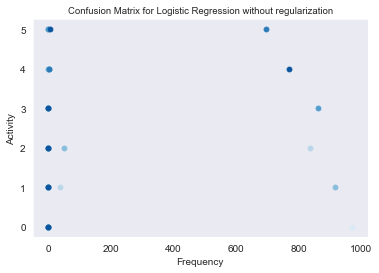

In [31]:
a=plt.axes()
sns.set_style('dark')
sns.set_palette('Paired_r')
sns.set_context('paper')
a.plot(ErrorDF['Confusionmatrix'][0],Y_test.value_counts().index.values,ls='',marker='o')
a.set(xLabel='Frequency',yLabel='Activity',title='Confusion Matrix for Logistic Regression without regularization')

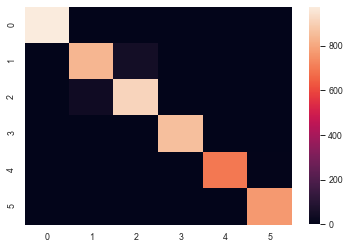

In [32]:
sns.heatmap(ErrorDF['Confusionmatrix'][0]) # we can have mapped here frequency,and predicted value is how many times correct

[Text(0, 0.5, 'Activity'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Lasso')]

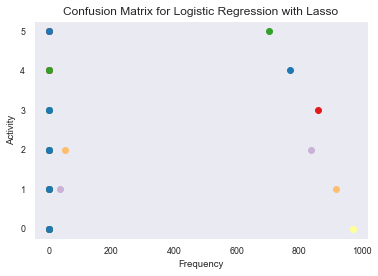

In [33]:
b=plt.axes()
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('rainbow')
b.plot(ErrorDF['Confusionmatrix'][1],Y_test.value_counts().index.values,ls='',marker='o')
b.set(xLabel='Frequency',yLabel='Activity',title='Confusion Matrix for Logistic Regression with Lasso')


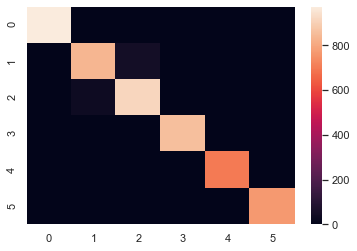

In [34]:
# Actual way to do it is 
sns.heatmap(ErrorDF['Confusionmatrix'][1])

[Text(0, 0.5, 'Activity'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Ridge')]

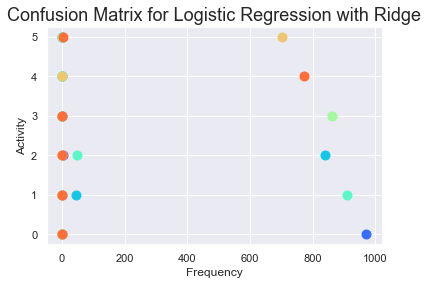

In [35]:
c=plt.axes()
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('Accent')
c.plot(ErrorDF['Confusionmatrix'][2],Y_test.value_counts().index.values,ls='',marker='o')
c.set(xLabel='Frequency',yLabel='Activity',title='Confusion Matrix for Logistic Regression with Ridge')

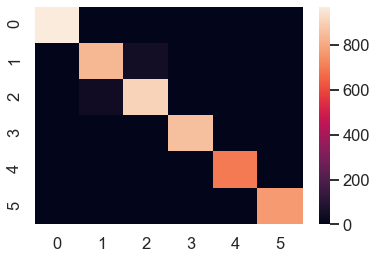

In [36]:
sns.heatmap(ErrorDF['Confusionmatrix'][2])

# R & D
* subplots?
* heatmap?


## Answer 9
* Identify highly correlated columns and drop those columns before building models

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data_new = pd.DataFrame(sel.fit_transform(X_data,Y_data))



from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(Y_data)

 Repeat Model building with new training data after removing higly correlated columns

## R & D
* when use which solver?
* what is ovr?multi_class?

In [38]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
lrr=LogisticRegression()
lrr=lrr.fit(X_new,Y_new)
modelpredictstd=lrr.predict(X_test_new)

In [39]:
clrr=LogisticRegressionCV(penalty='l1',cv=4,solver='liblinear')
l1rr=clrr.fit(X_new,Y_new)
lrrmodel=l1rr.predict(X_test_new)

In [40]:
clrr2=LogisticRegressionCV(cv=4,solver='saga')
clrr2=clrr2.fit(X_new,Y_new)
lmodel=clrr2.predict(X_test_new)

In [66]:

clr1=LogisticRegressionCV(cv=4,solver='sag',multi_class='ovr')
clr1=clr1.fit(X_new,Y_new)
lmmodel=clr1.predict(X_test_new)

In [42]:
clr4=LogisticRegressionCV(cv=4,solver='newton-cg')
clr4=clr4.fit(X_new,Y_new)
l3model=clr4.predict(X_test_new)

In [43]:
clr5=LogisticRegressionCV(cv=4,solver='lbfgs')
clr5=clr5.fit(X_new,Y_new)
l4model=clr5.predict(X_test_new)

In [44]:
lmodel,l1model,l3model,l4model


(array([0, 2, 0, ..., 2, 0, 2]),
 array([1, 2, 0, ..., 1, 3, 2]),
 array([0, 2, 0, ..., 2, 0, 2]),
 array([0, 2, 0, ..., 2, 0, 2]))

## Answer 10
* Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [115]:

magnitude(lrr.coef_),magnitude(l1rr.coef_),magnitude(clrr2.coef_),magnitude(clr1.coef_),magnitude(clr4.coef_),magnitude(clr5.coef_)


(1.1920760359695466,
 0.0,
 0.027202928783185105,
 0.006887054779708702,
 0.027203545100999472,
 0.027172973960168944)

Prepare six separate plots for each of the multi-class coefficients.

In [3]:

coefficients = list()

coeff_labels = ['lrr', 'l1rr', 'clrr2','clr1','clr4','clr5']
coeff_models = [lrr, l1rr, clrr2,clr1,clr4,clr5]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]]
                                       )
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)


NameError: name 'lrr' is not defined

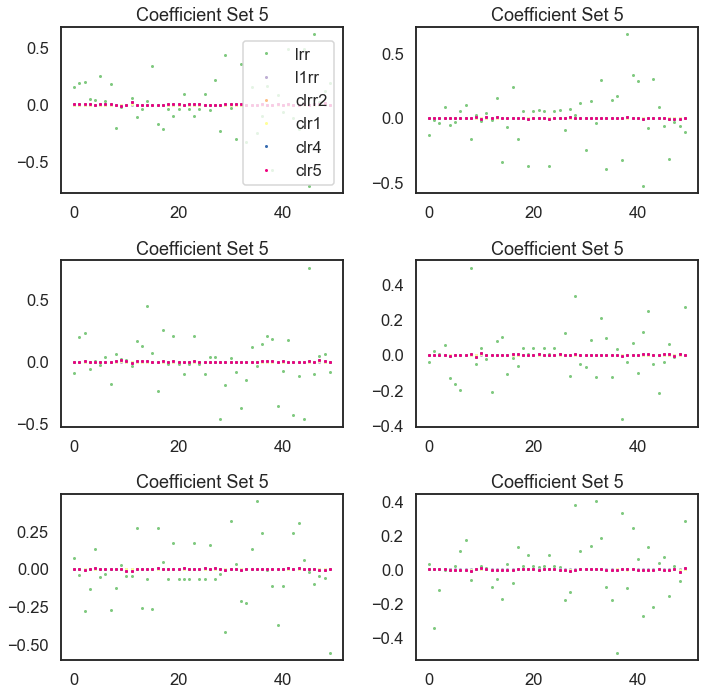

In [154]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList): # enum pairs up with index values and values
    location = ax[0]
    ax = ax[1]
    data = coefficients.xs(location, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))
plt.tight_layout()

## Answer 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [47]:
libprob=lrr.predict_proba(X_test_new)
sagprob=l1rr.predict_proba(X_test_new)
sagaprob=clrr2.predict_proba(X_test_new)
newtonprob=clr1.predict_proba(X_test_new)
lbfgsprob=clr4.predict_proba(X_test_new)
stdprob=clr5.predict_proba(X_test_new)

## Answer 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [138]:
stdobj=Errormes(Y_test_new,modelpredictstd)
sagobj=Errormes(Y_test_new,lmmodel)
sagaobj=Errormes(Y_test_new,lmodel)
libobj=Errormes(Y_test_new,lrrmodel)
newtonobj=Errormes(Y_test_new,l3model)
lbfgsobj=Errormes(Y_test_new,l4model)
 
ErrorDF2=pd.DataFrame({'Type':['Standard logisitc model','sag','saga','lib','newton','lbfgs'],'F1':[stdobj.F1(),sagobj.F1(),sagaobj.F1(),newtonobj.F1(),lbfgsobj.F1(),libobj.F1()],
         'Confusionmatrix':[stdobj.Confusionmatrix(),sagobj.Confusionmatrix(),sagaobj.Confusionmatrix(),newtonobj.Confusionmatrix(),lbfgsobj.Confusionmatrix(),libobj.Confusionmatrix()],
         'Accuracy':[stdobj.Accuracy(),sagobj.Accuracy(),sagaobj.Accuracy(),newtonobj.Accuracy(),lbfgsobj.Accuracy(),libobj.Accuracy()],
         'Precision':[stdobj.Precision(),sagobj.Precision(),sagaobj.Precision(),newtonobj.Precision(),lbfgsobj.Precision(),libobj.Precision()],
         'Recall':[stdobj.Recall(),sagobj.Recall(),sagaobj.Recall(),newtonobj.Recall(),lbfgsobj.Recall(),libobj.Recall()]
                      })
ErrorDF2['Confusionmatrix'][0]

array([[188, 105, 163,  35,   5,   4],
       [168,  89, 140,  41,   8,   4],
       [150, 105, 160,  48,   7,   4],
       [142,  85, 145,  35,   5,   3],
       [148,  53, 114,  26,   2,   2],
       [139,  79, 122,  45,   2,   4]], dtype=int64)

## Answer 13
* Display or plot the confusion matrix for each model.

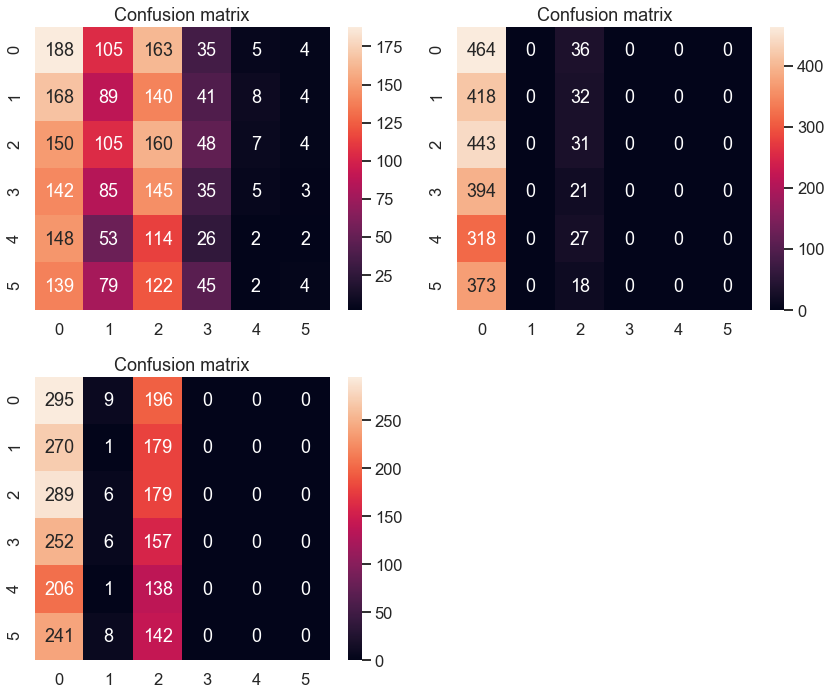

In [145]:

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
coefs=[0,1,2,3,4,5]
axList[-1].axis('off')

for ax,i in zip(axList[:-1], coefs):
    sns.heatmap(ErrorDF2['Confusionmatrix'][i], ax=ax, annot=True, fmt='d');
    ax.set(title='Confusion matrix');
    
plt.tight_layout()